In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Datahack-Customer-Segmentation/input/Train.csv')
test = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Datahack-Customer-Segmentation/input/Test.csv')

In [3]:
len(train)

8068

In [4]:
len(test)

2627

In [5]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [7]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [47]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [17]:
df = train.copy()

In [18]:
# df = df.fillna(-1)

In [19]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [20]:
cols = list(df.columns)

In [21]:
df.sort_values('ID')[:20]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7238,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C
5546,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C
4373,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C
4695,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D
3333,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D
174,458987,Female,Yes,72,Yes,Lawyer,0.0,High,2.0,Cat_6,C
7679,458988,Female,No,29,No,Marketing,2.0,Low,3.0,Cat_6,D
4977,458989,Female,Yes,42,Yes,Engineer,1.0,Low,1.0,Cat_6,B
673,458990,Female,Yes,71,No,Lawyer,1.0,High,3.0,Cat_6,D
1823,458991,Female,Yes,84,Yes,Lawyer,3.0,High,2.0,Cat_6,A


In [22]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [23]:
cols

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

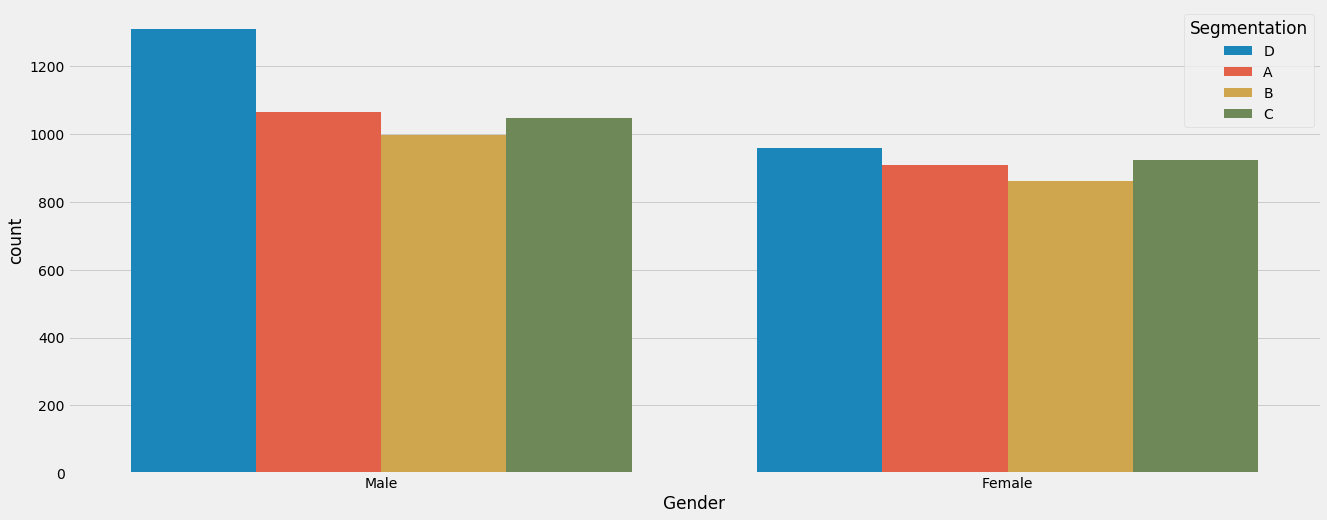

In [24]:
plt.figure(figsize = (20,8))

sns.countplot(df['Gender'], hue = df['Segmentation'])

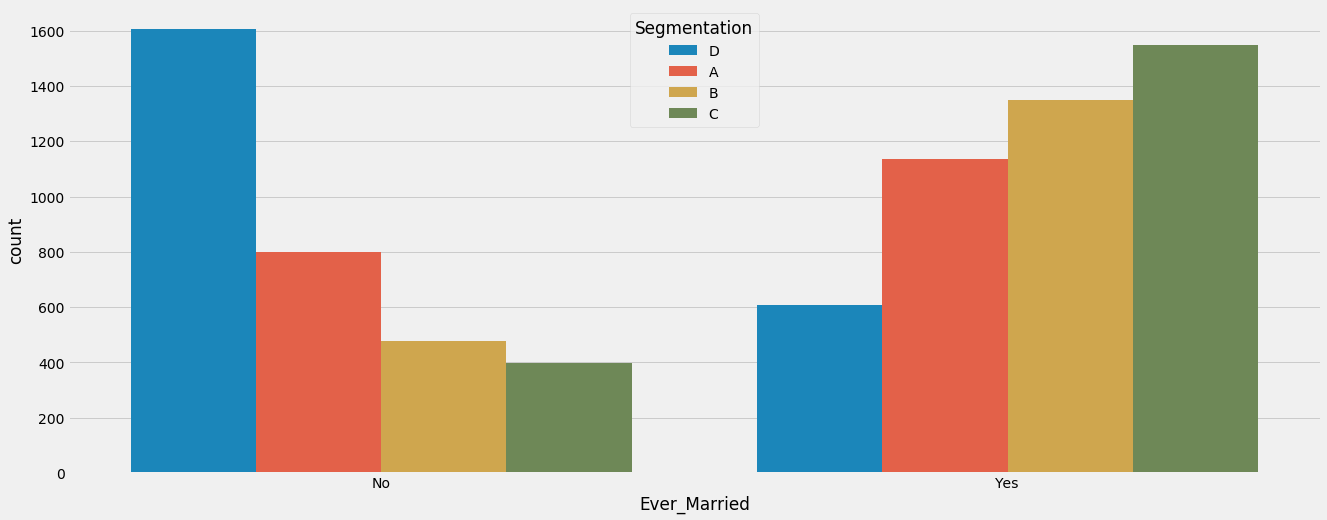

In [25]:
plt.figure(figsize = (20,8))

sns.countplot(df['Ever_Married'], hue = df['Segmentation'])

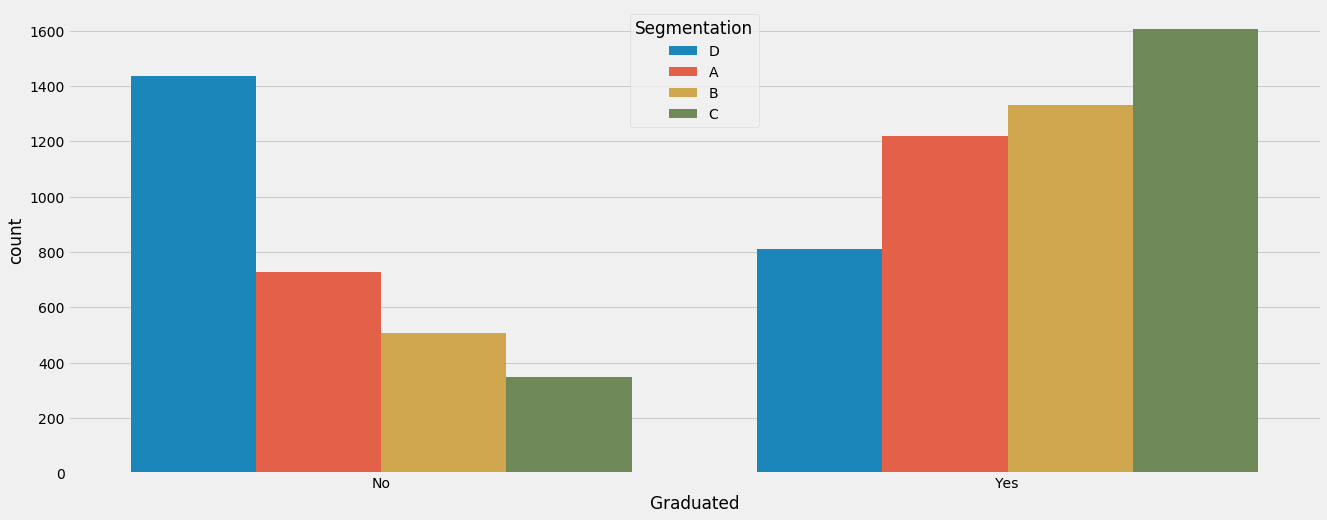

In [26]:
plt.figure(figsize = (20,8))

sns.countplot(df['Graduated'], hue = df['Segmentation'])

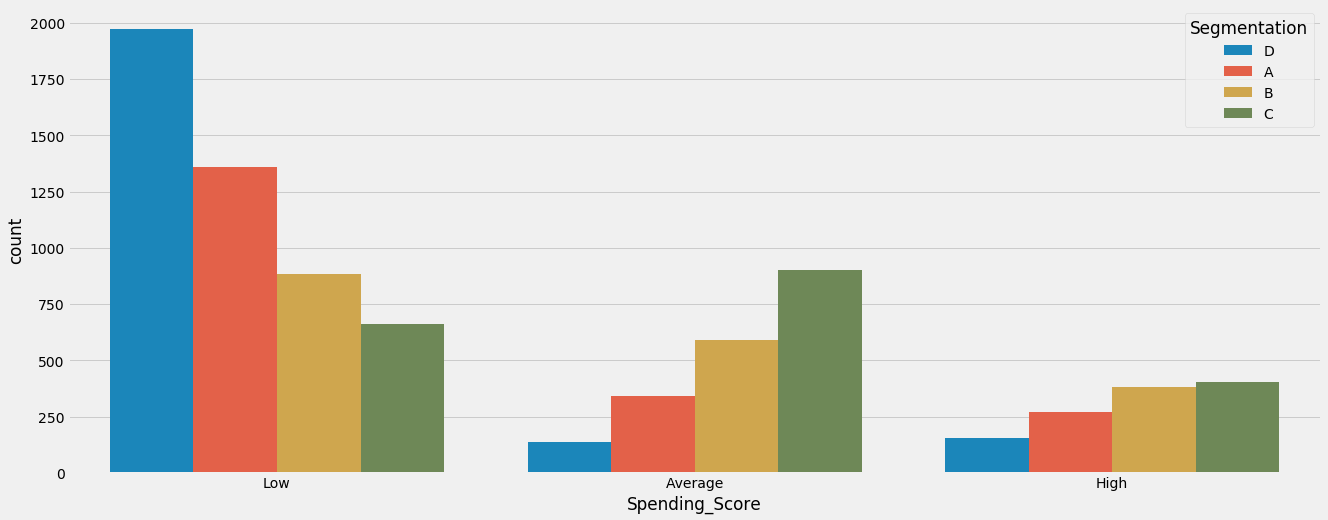

In [27]:
plt.figure(figsize = (20,8))

sns.countplot(df['Spending_Score'], hue = df['Segmentation'])

In [30]:
for i in range(len(df)):
    if df['Spending_Score'][i] == 'Average':
        df['Spending_Score'][i] = 'High'

/home/devesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df['Spending_Score'].value_counts()

Low     4878
High    3190
Name: Spending_Score, dtype: int64

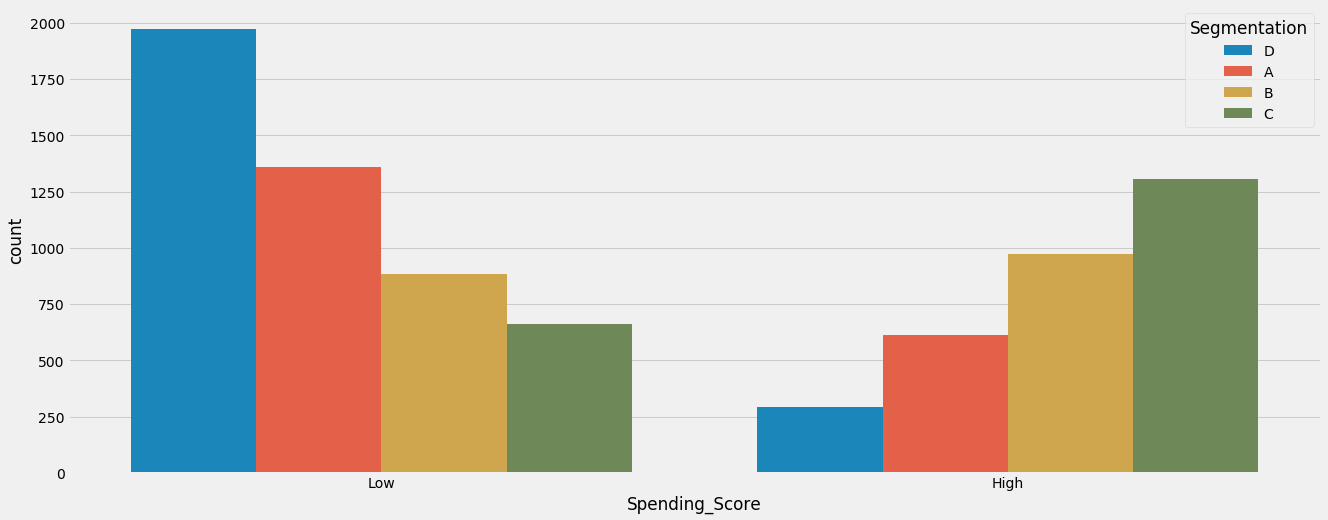

In [32]:
plt.figure(figsize = (20,8))

sns.countplot(df['Spending_Score'], hue = df['Segmentation'])

In [38]:
seg_A = df.loc[df['Segmentation'] == 'A']
seg_B = df.loc[df['Segmentation'] == 'B']
seg_C = df.loc[df['Segmentation'] == 'C']
seg_D = df.loc[df['Segmentation'] == 'D']

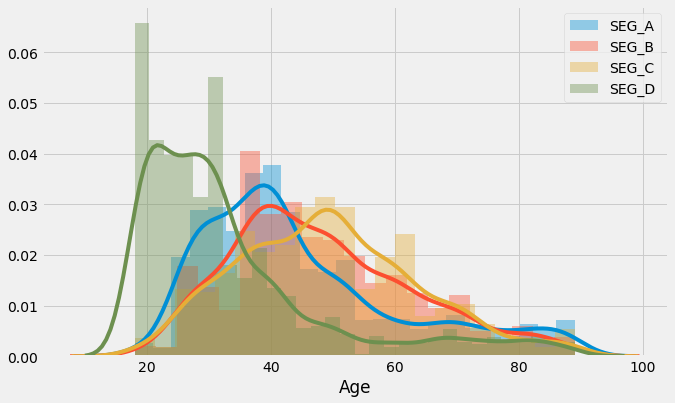

In [41]:
plt.figure(figsize = (10,6))

sns.distplot(seg_A['Age'], label='SEG_A')
sns.distplot(seg_B['Age'], label='SEG_B')
sns.distplot(seg_C['Age'], label='SEG_C')
sns.distplot(seg_D['Age'], label='SEG_D')

plt.legend()

plt.show()

In [42]:
age_great_40 = []

for i in range(len(df)):
    if df['Age'][i] > 40:
        age_great_40.append(1)
    else:
        age_great_40.append(0)

In [43]:
df['age_great_40'] = age_great_40

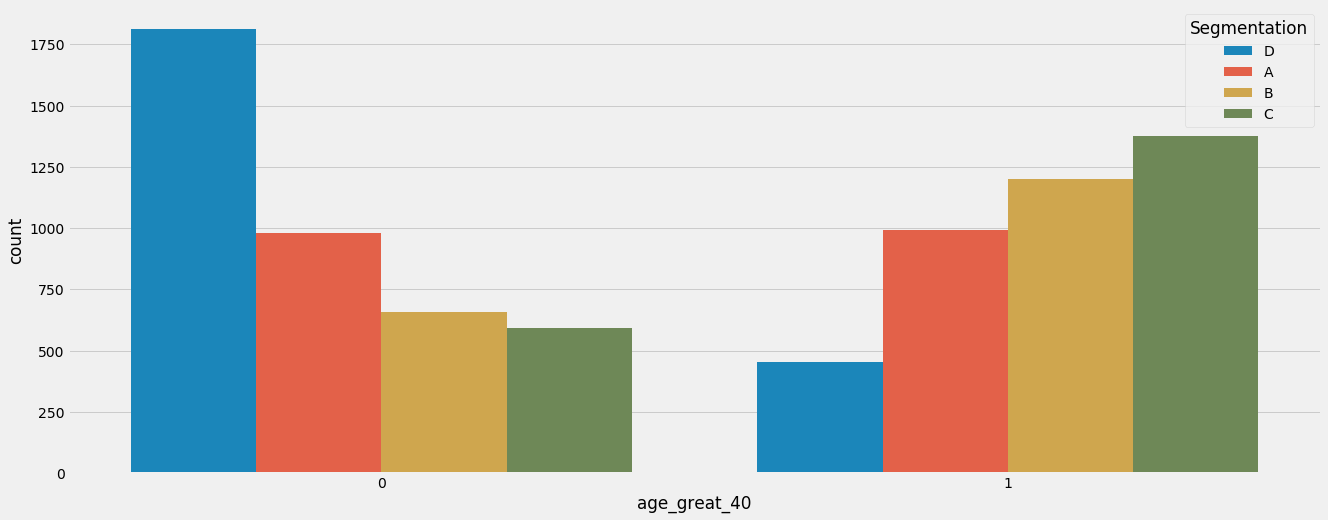

In [44]:
plt.figure(figsize = (20,8))

sns.countplot(df['age_great_40'], hue = df['Segmentation'])

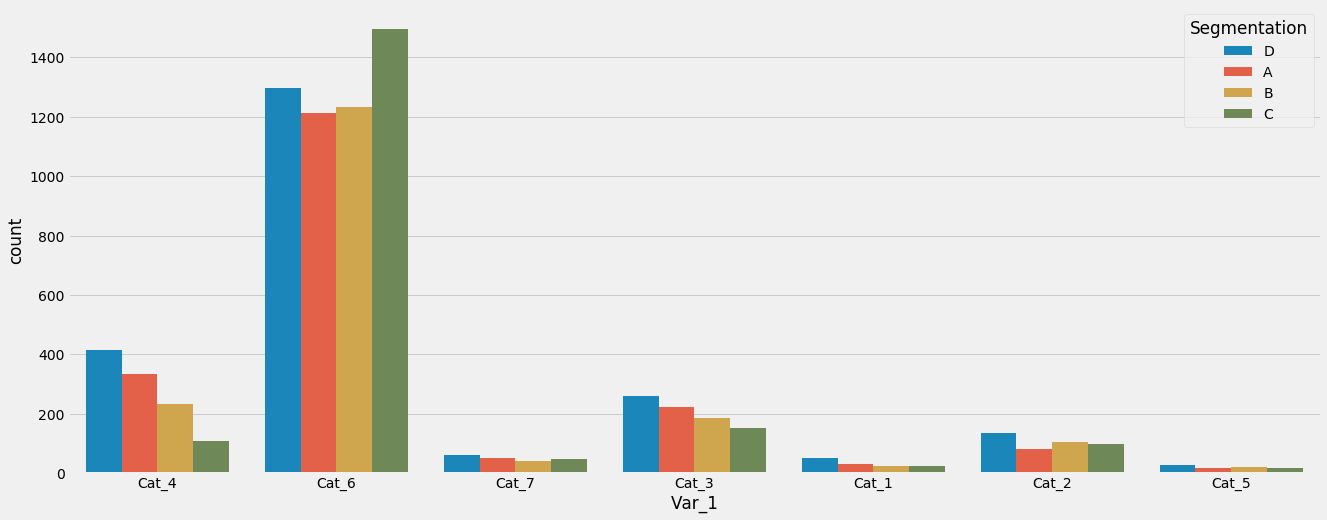

In [46]:
plt.figure(figsize = (20,8))

sns.countplot(df['Var_1'], hue = df['Segmentation'])

In [48]:
df['Var_1'] = df['Var_1'].fillna('Cat_6')

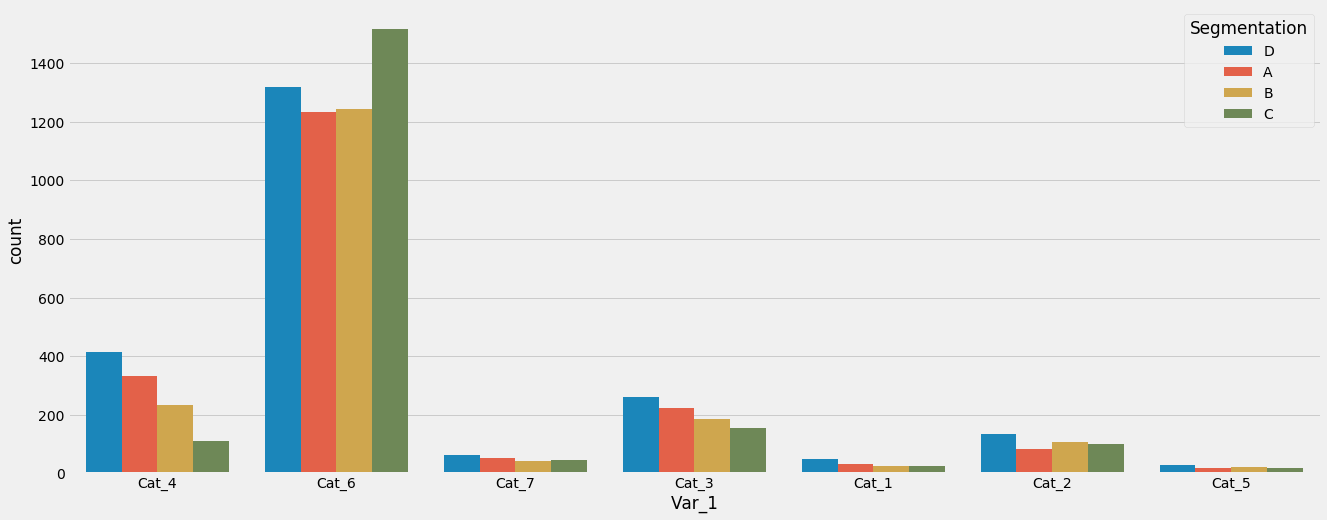

In [49]:
plt.figure(figsize = (20,8))

sns.countplot(df['Var_1'], hue = df['Segmentation'])

In [50]:
cat_4_3_1 = []
cat_6_7_1_5 = []

for i in range(len(df)):
    if (df['Var_1'][i] == 'Cat_4') or (df['Var_1'][i] == 'Cat_3') or (df['Var_1'][i] == 'Cat_1'):
        cat_4_3_1.append(1)
        cat_6_7_1_5.append(0)
    else:
        cat_4_3_1.append(0)
        cat_6_7_1_5.append(1)

In [51]:
df['cat_4_3_1'] = cat_4_3_1

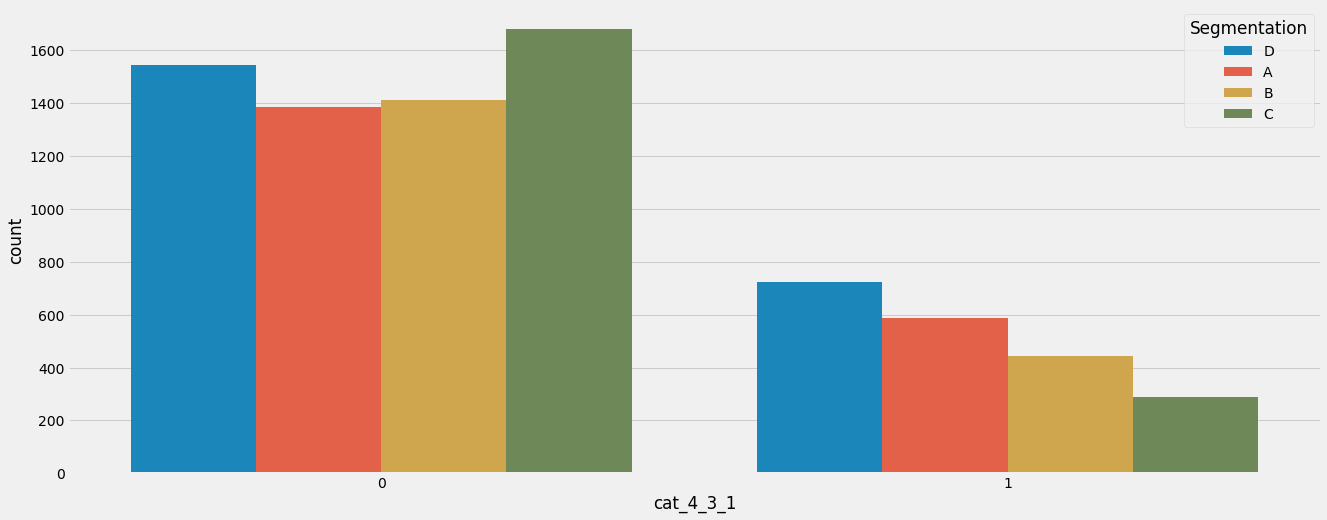

In [52]:
plt.figure(figsize = (20,8))

sns.countplot(df['cat_4_3_1'], hue = df['Segmentation'])

In [57]:
df['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

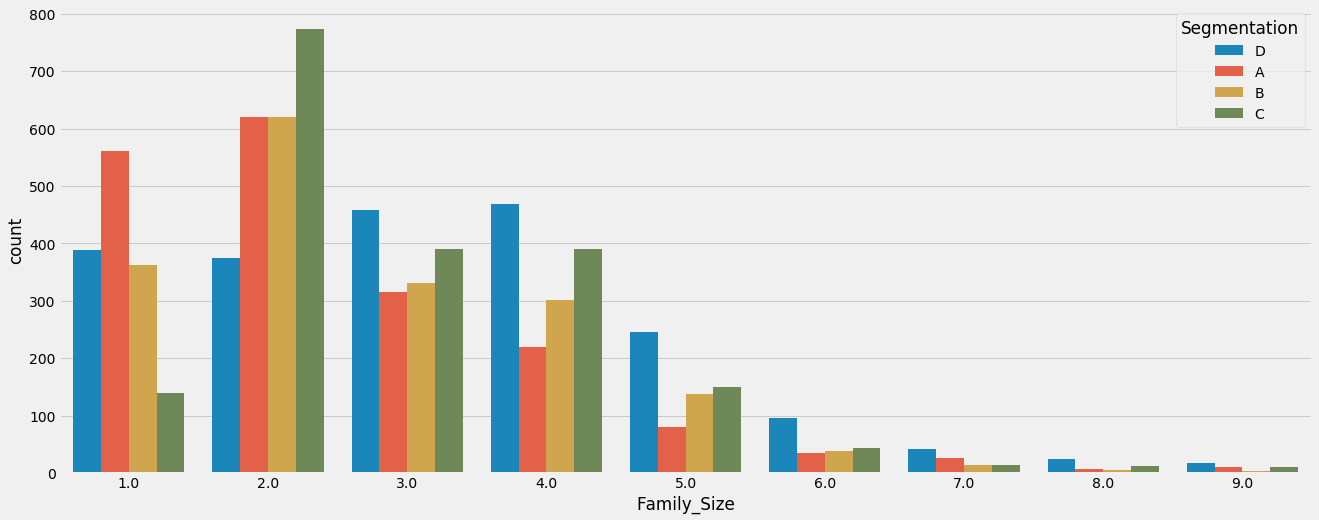

In [58]:
plt.figure(figsize = (20,8))

sns.countplot(df['Family_Size'], hue = df['Segmentation'])

In [59]:
df['Family_Size'] = df['Family_Size'].fillna(2)

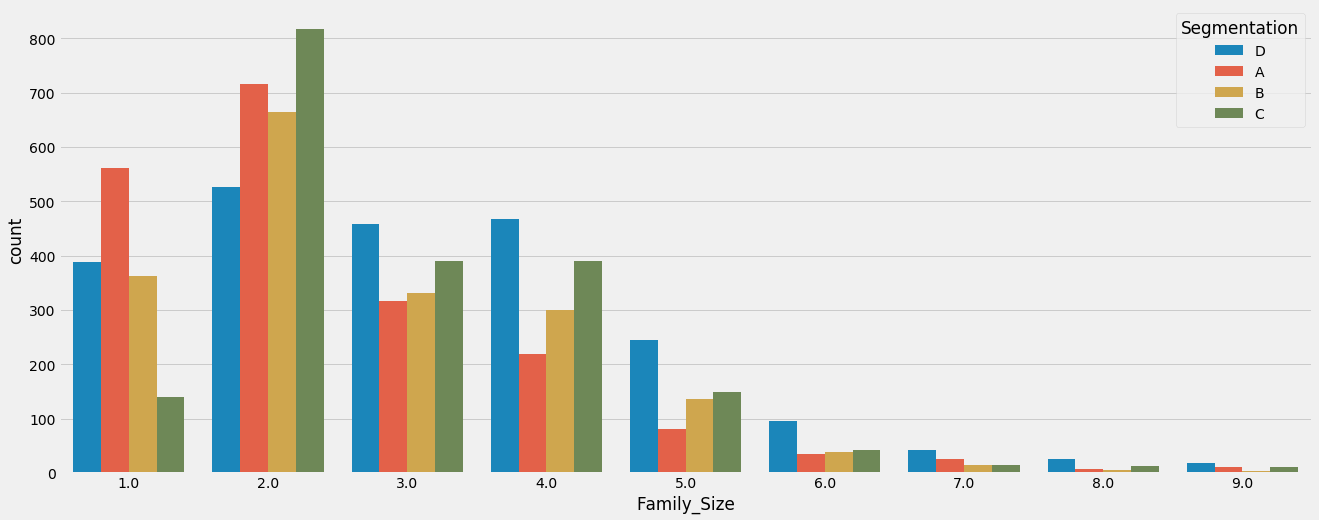

In [60]:
plt.figure(figsize = (20,8))

sns.countplot(df['Family_Size'], hue = df['Segmentation'])

In [61]:
FS_3_4_5_6 = []

for i in range(len(df)):
    if (df['Family_Size'][i] == 3.0) or (df['Family_Size'][i] == 4.0) or (df['Family_Size'][i] == 5.0) or (df['Family_Size'][i] == 6.0):
        FS_3_4_5_6.append(1)
    else:
        FS_3_4_5_6.append(0)

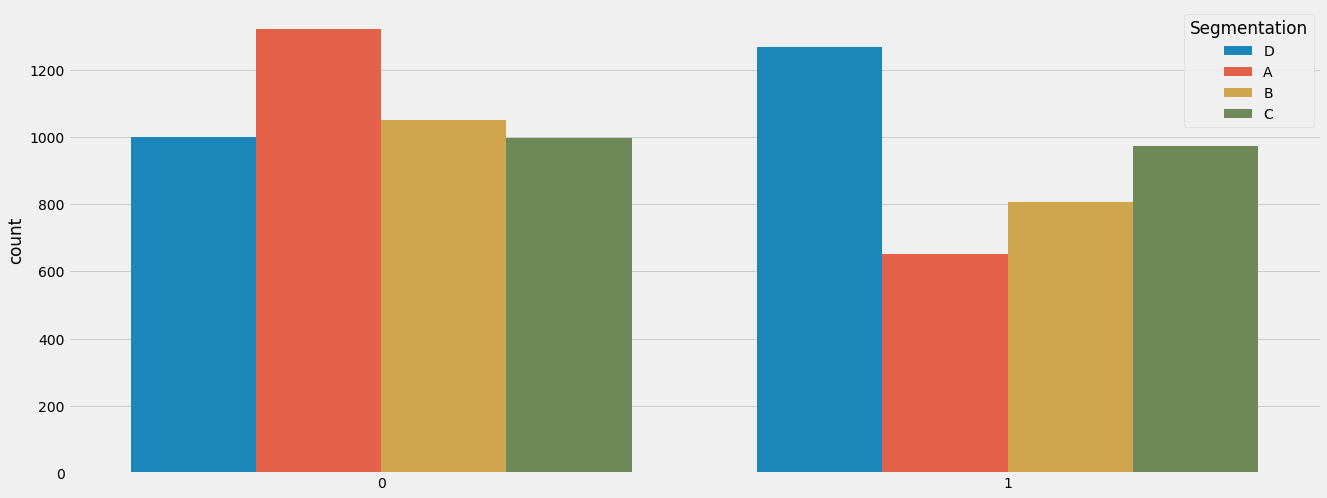

In [62]:
plt.figure(figsize = (20,8))

sns.countplot(FS_3_4_5_6, hue = df['Segmentation'])

In [63]:
df['FS_3_4_5_6'] = FS_3_4_5_6

In [64]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'age_great_40', 'cat_4_3_1', 'FS_3_4_5_6'],
      dtype='object')

In [66]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
age_great_40         0
cat_4_3_1            0
FS_3_4_5_6           0
dtype: int64

In [67]:
df['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

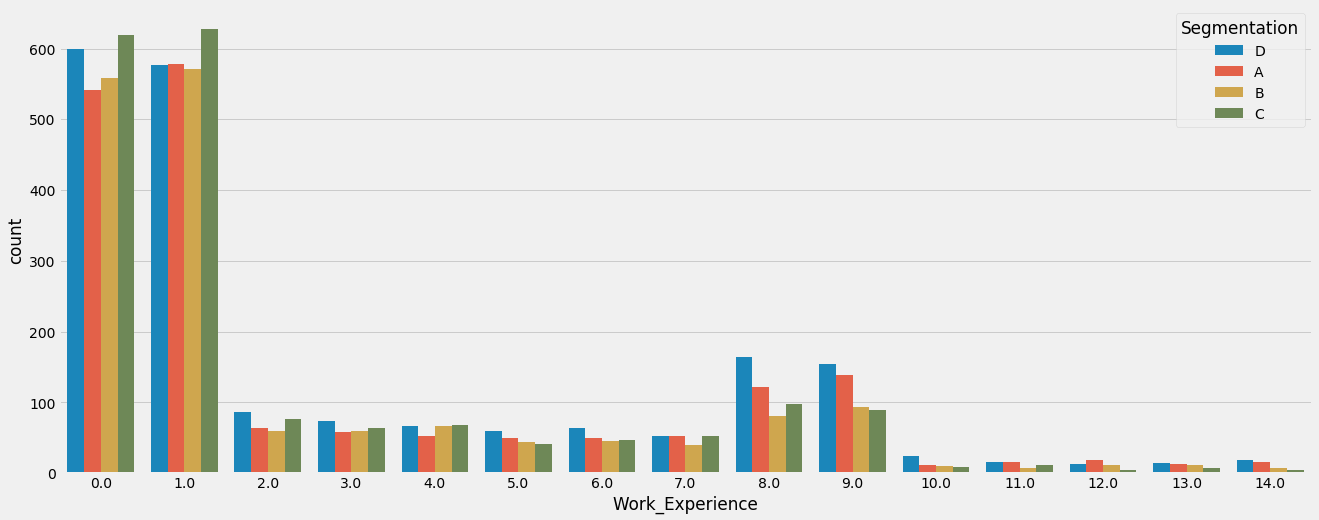

In [68]:
plt.figure(figsize = (20,8))

sns.countplot(df['Work_Experience'], hue = df['Segmentation'])

In [69]:
df['Work_Experience'] = df['Work_Experience'].fillna(1.0)

In [70]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

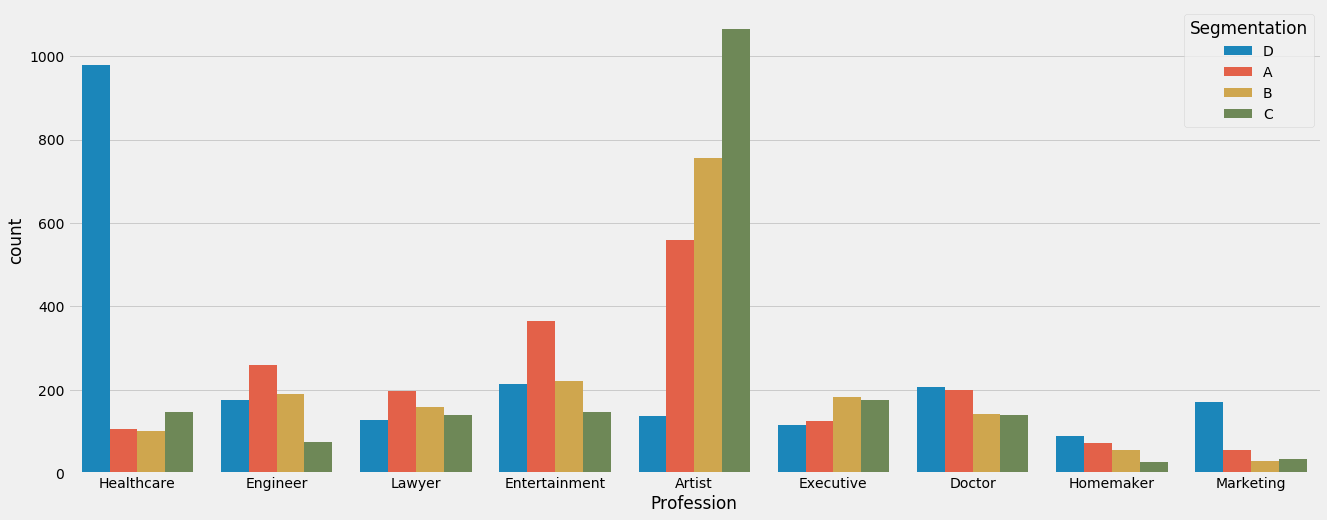

In [71]:
plt.figure(figsize = (20,8))

sns.countplot(df['Profession'], hue = df['Segmentation'])

In [72]:
df['Profession'] = df['Profession'].fillna('Artist')

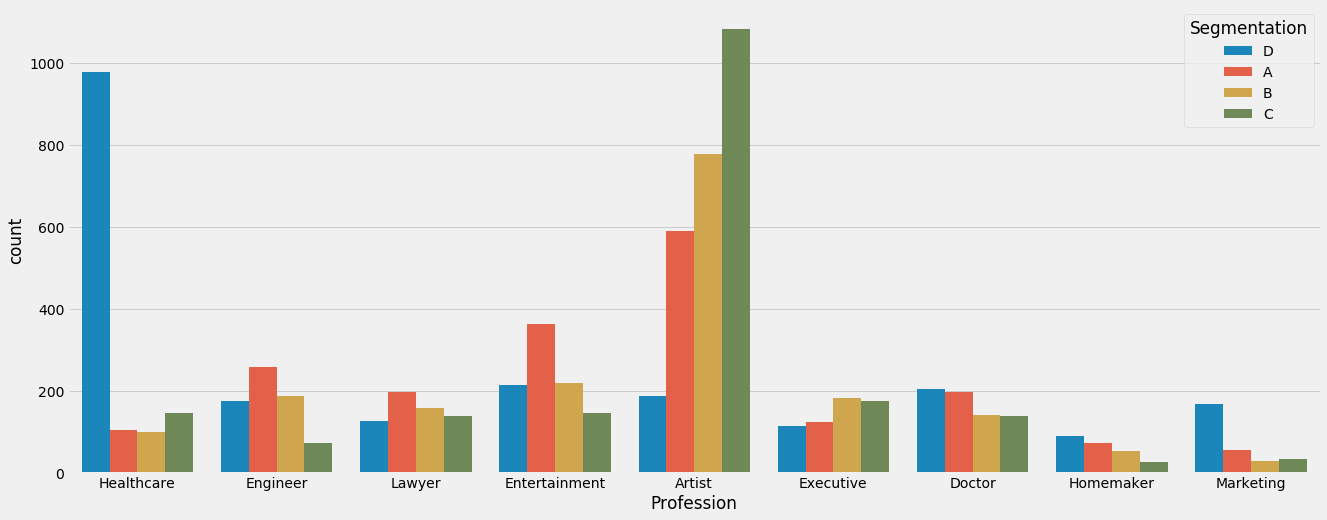

In [73]:
plt.figure(figsize = (20,8))

sns.countplot(df['Profession'], hue = df['Segmentation'])

In [74]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [75]:
df['Graduated'] = df['Graduated'].fillna('none')

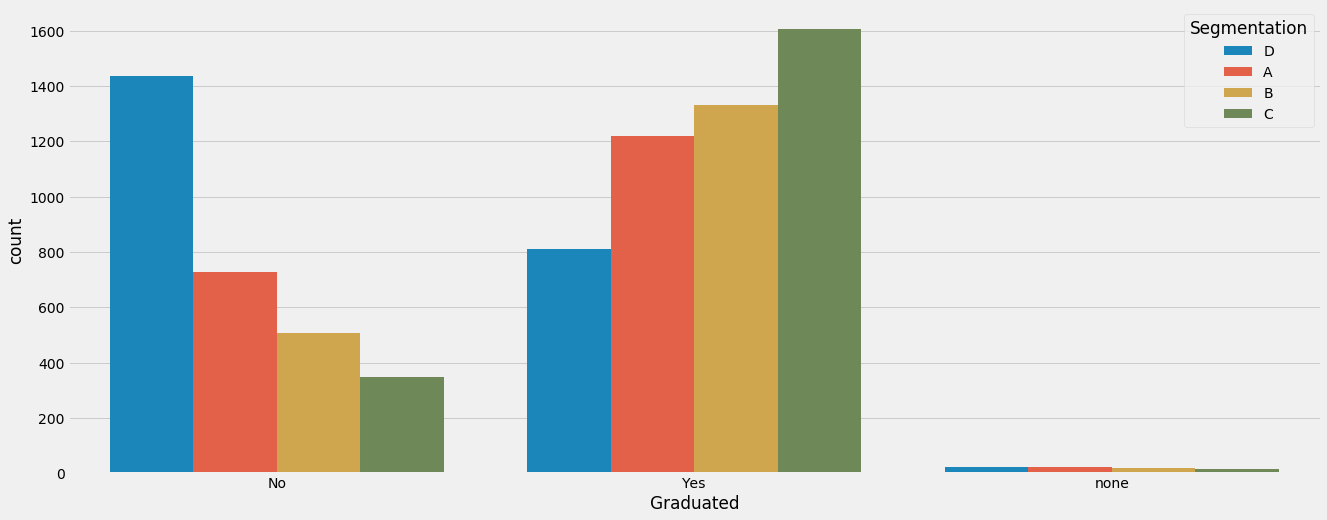

In [76]:
plt.figure(figsize = (20,8))

sns.countplot(df['Graduated'], hue = df['Segmentation'])

In [78]:
df['Graduated'] = df['Graduated'].replace('none', 'No')

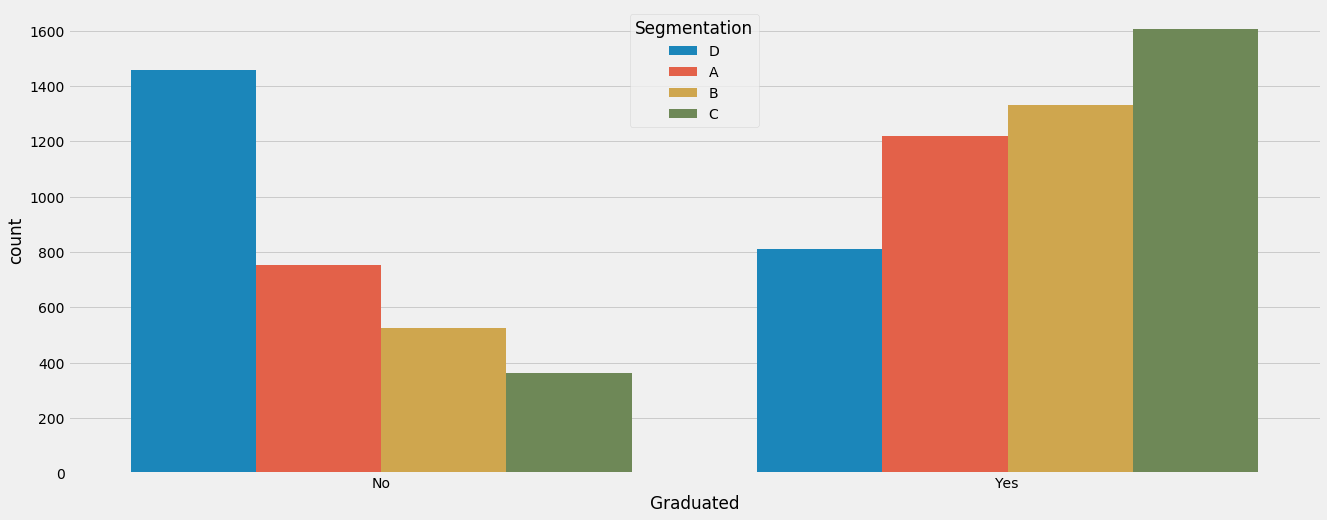

In [79]:
plt.figure(figsize = (20,8))

sns.countplot(df['Graduated'], hue = df['Segmentation'])

In [80]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [81]:
df['Ever_Married'] = df['Ever_Married'].fillna('non')

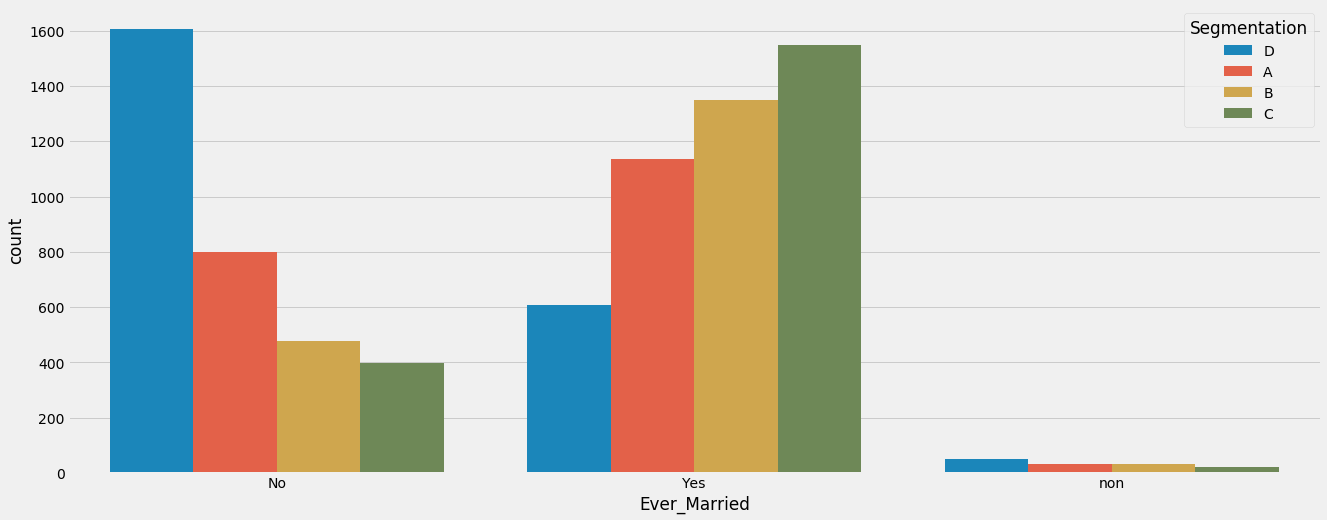

In [82]:
plt.figure(figsize = (20,8))

sns.countplot(df['Ever_Married'], hue = df['Segmentation'])

In [83]:
df['Ever_Married'] = df['Ever_Married'].replace('non', 'No')

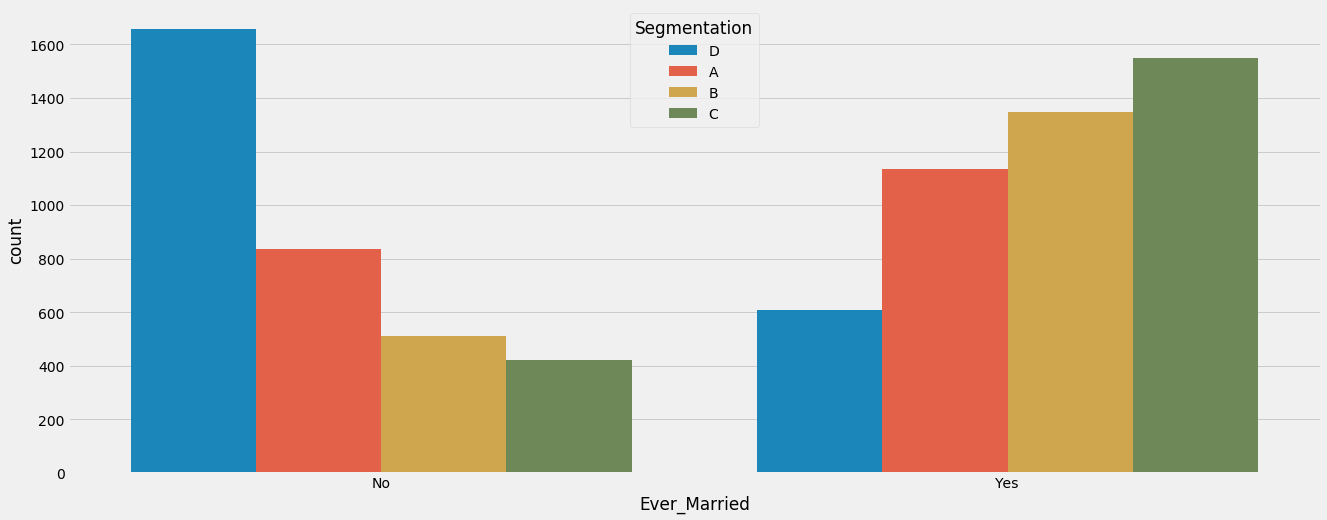

In [84]:
plt.figure(figsize = (20,8))

sns.countplot(df['Ever_Married'], hue = df['Segmentation'])

In [86]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
age_great_40       0
cat_4_3_1          0
FS_3_4_5_6         0
dtype: int64

In [87]:
cluster_col = ['Ever_Married', 'Graduated', 'Spending_Score', 'age_great_40']

In [88]:
cluster_df = df[cluster_col]

In [90]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cluster_col:
    cluster_df[col] = encoder.fit_transform(cluster_df[col])

/home/devesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
cluster_df.head()

,Ever_Married,Graduated,Spending_Score,age_great_40
0,0,0,1,0
1,1,1,0,0
2,1,1,1,1
3,1,1,0,1
4,1,1,0,0


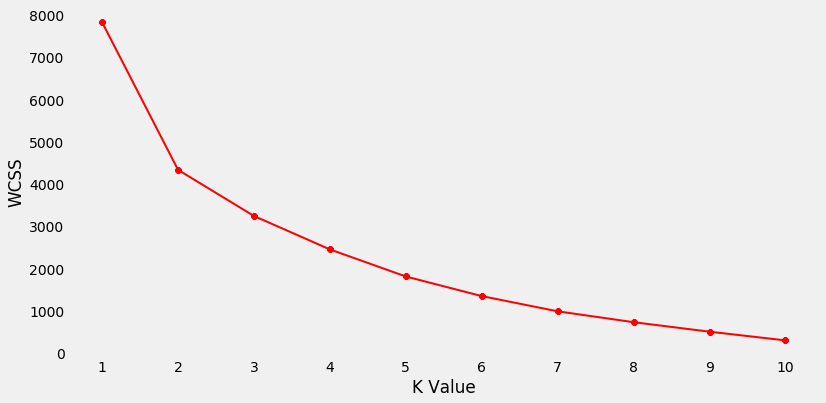

In [92]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cluster_df.values)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [93]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(cluster_df.values)

In [95]:
df['clusters'] = clusters

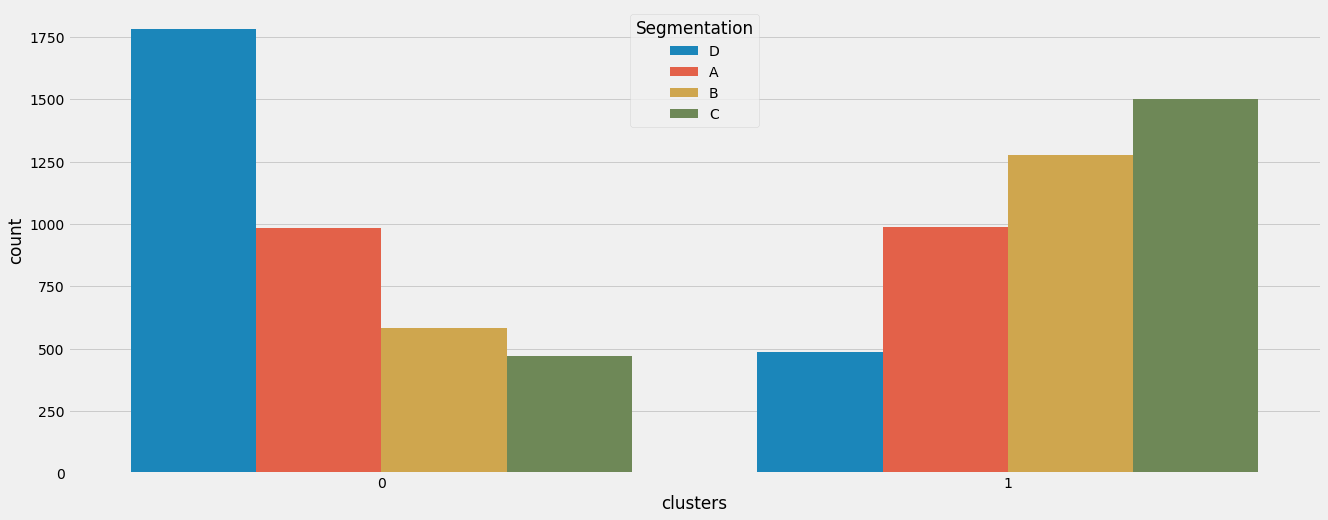

In [96]:
plt.figure(figsize = (20,8))

sns.countplot(df['clusters'], hue = df['Segmentation'])

In [97]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'age_great_40', 'cat_4_3_1', 'FS_3_4_5_6', 'clusters'],
      dtype='object')

In [98]:
df.drop(['ID'], axis = 1, inplace = True)

In [101]:
cols = list(df.columns)

In [102]:
cols.remove('Age')

In [103]:
for col in cols:
    df[col] = encoder.fit_transform(df[col])

In [104]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,age_great_40,cat_4_3_1,FS_3_4_5_6,clusters
0,1,0,22,0,5,1,1,3,3,3,0,1,1,0
1,0,1,38,1,2,1,0,2,3,0,0,1,1,1
2,0,1,67,1,2,1,1,0,5,1,1,0,0,1
3,1,1,67,1,7,0,0,1,5,1,1,0,0,1
4,0,1,40,1,3,1,0,5,5,0,0,0,1,1


In [105]:
target = df['Segmentation']

In [106]:
df.drop(['Segmentation'], axis = 1, inplace = True)

In [107]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

model = LGBMClassifier()

scores = cross_val_score(model, df, target, cv = 5, scoring = 'accuracy')

In [108]:
scores

array([0.53531599, 0.52416357, 0.51796778, 0.52448853, 0.52572846])

In [110]:
sorted_train = train.sort_values('ID')

In [111]:
sorted_train['ID'].min()

458982

In [112]:
sorted_train['ID'] = sorted_train['ID'] - 458982

In [115]:
sorted_train['encoded_seg'] = encoder.fit_transform(sorted_train['Segmentation'])

In [116]:
sorted_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,encoded_seg
7238,0,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C,2
5546,1,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C,2
4373,2,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C,2
4695,3,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D,3
3333,4,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D,3


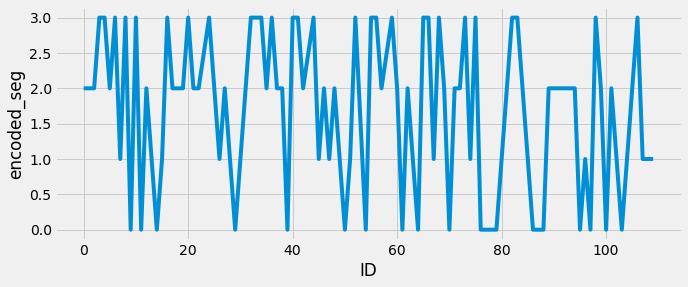

In [123]:
plt.figure(figsize = (10,4))

sns.lineplot(x = sorted_train['ID'][:100], y = sorted_train['encoded_seg'][:100])